In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor


Loading data

In [9]:

# Load your data
df = pd.read_csv('data/train.csv')  # Replace with your actual data file

In [10]:
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6


In [7]:
weather_data = pd.read_csv('data/weather-data.csv')

Displaying basic info to spot trends

In [11]:
#Convert the 'id' column to datetime
df['id'] = pd.to_datetime(df['id'])

# Set 'id' as the index
df.set_index('id', inplace=True)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   valeur_NO2   37694 non-null  float64
 1   valeur_CO    28462 non-null  float64
 2   valeur_O3    40298 non-null  float64
 3   valeur_PM10  33824 non-null  float64
 4   valeur_PM25  39200 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB
None
         valeur_NO2     valeur_CO     valeur_O3   valeur_PM10   valeur_PM25
count  37694.000000  28462.000000  40298.000000  33824.000000  39200.000000
mean      21.831528      0.200710     50.574349     18.221523     11.051161
std       14.658381      0.103691     26.488626     11.282385      8.151742
min        1.100000      0.037000     -1.900000      0.500000      0.000000
25%       11.300000      0.145000     33.000000     10.700000      5.800000
50%       17.600000      0.177000     50.700000     15.600000 

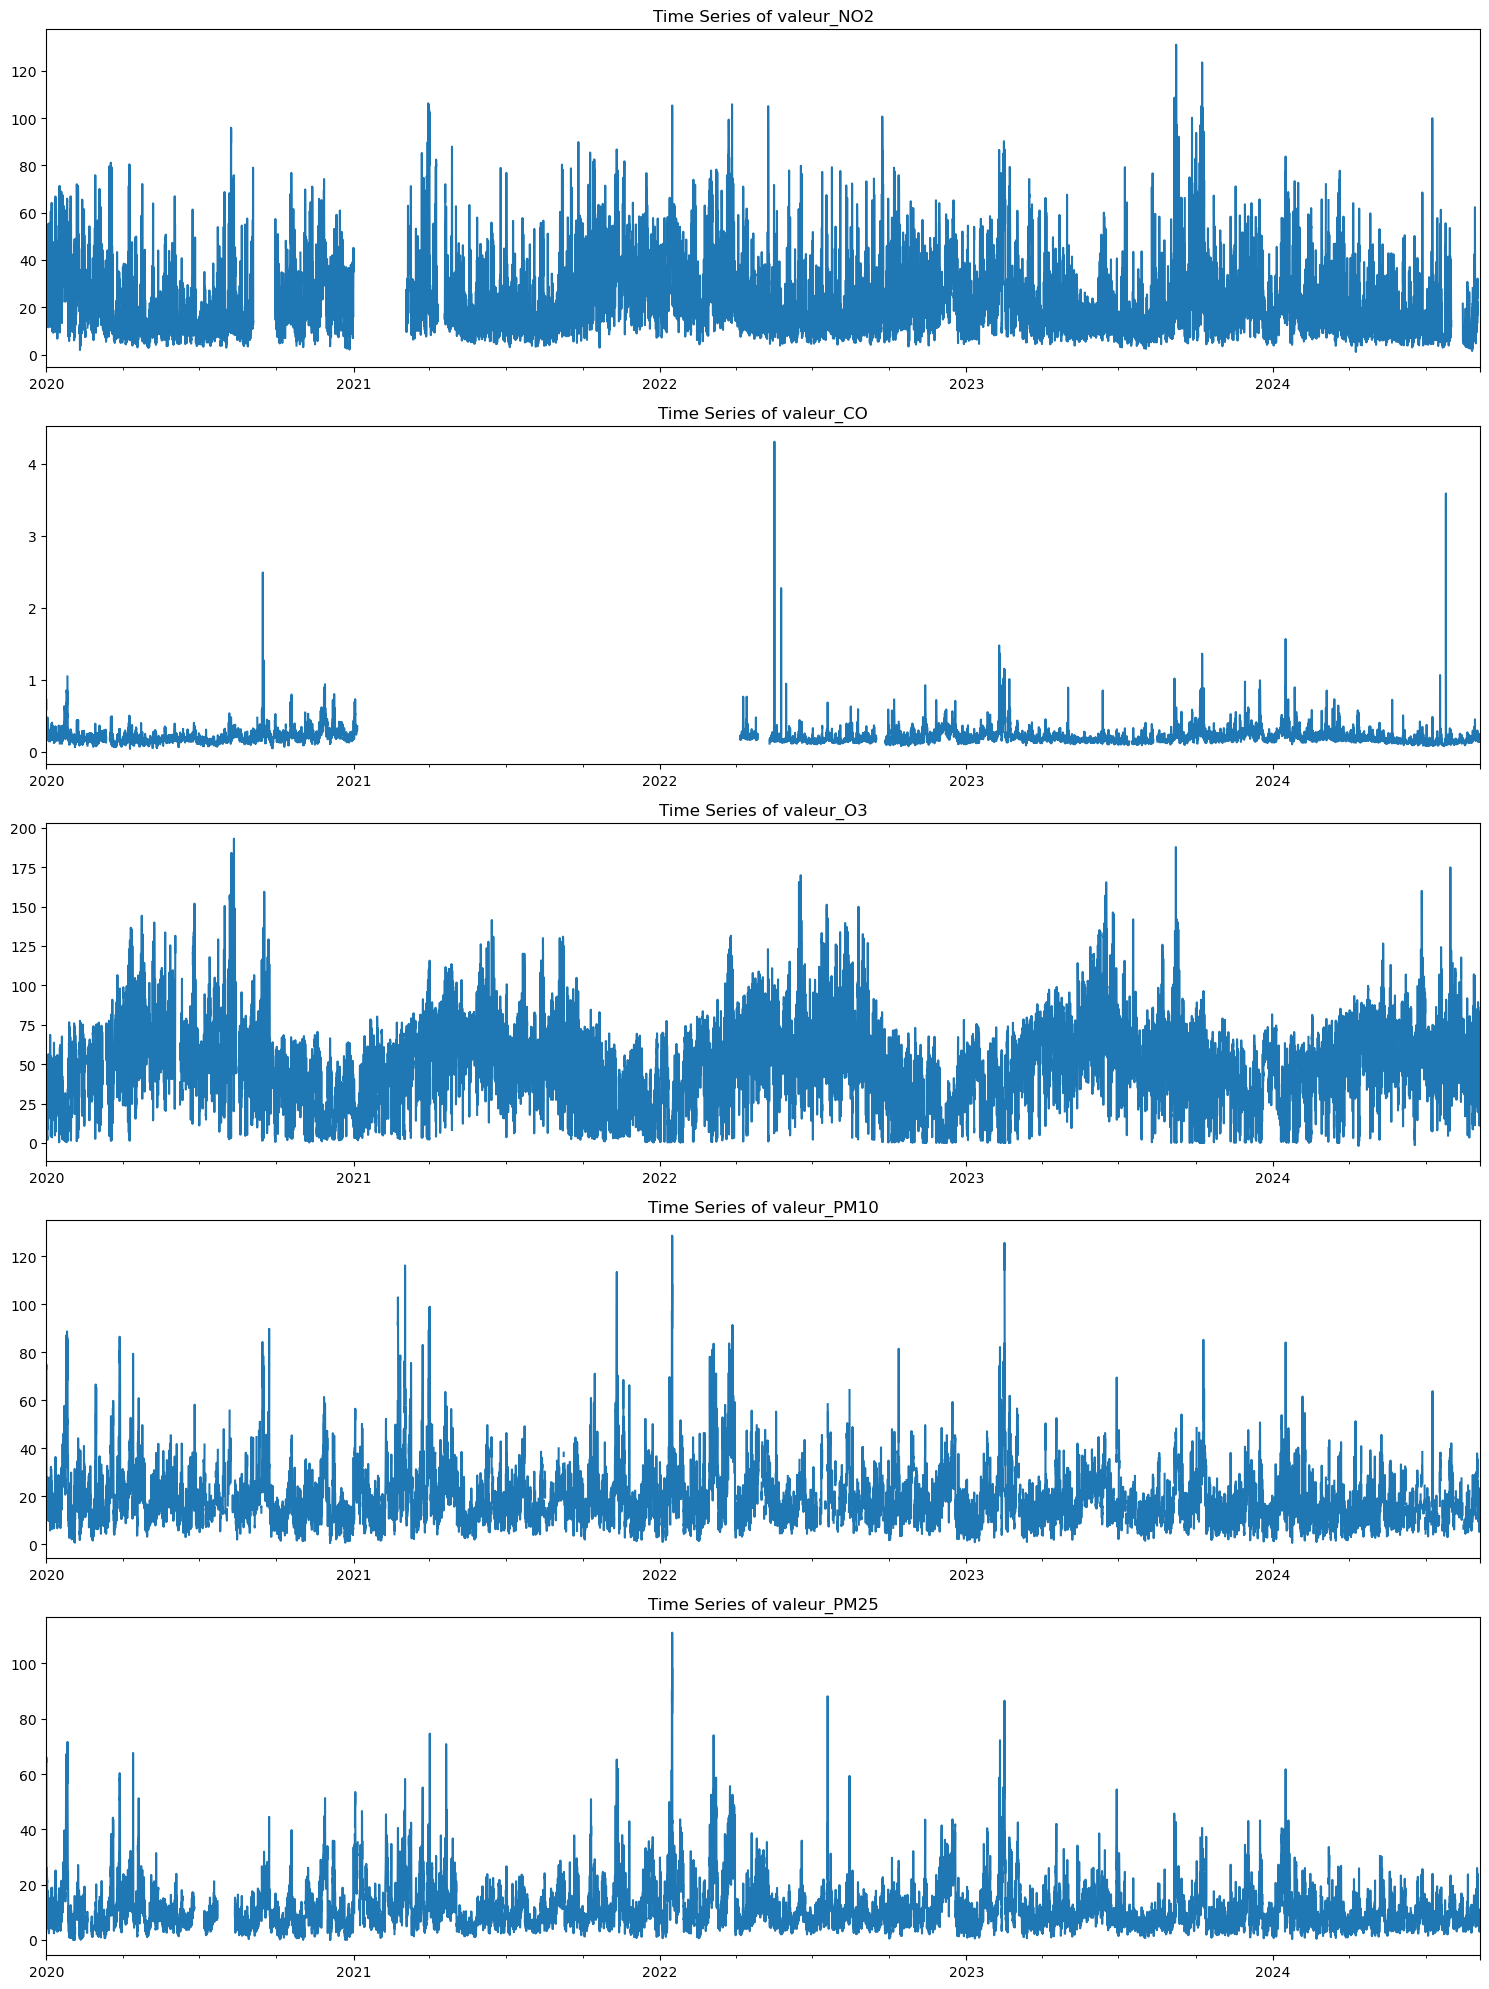

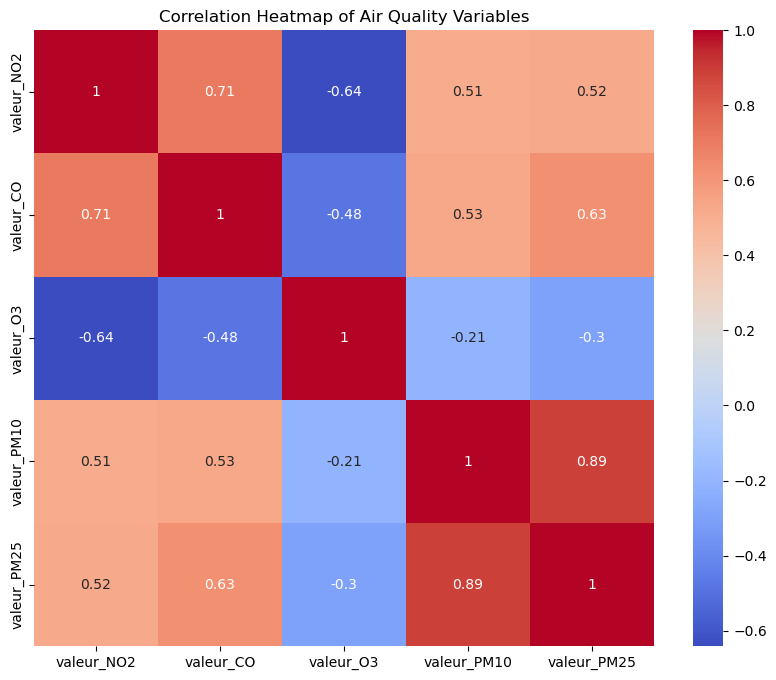

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

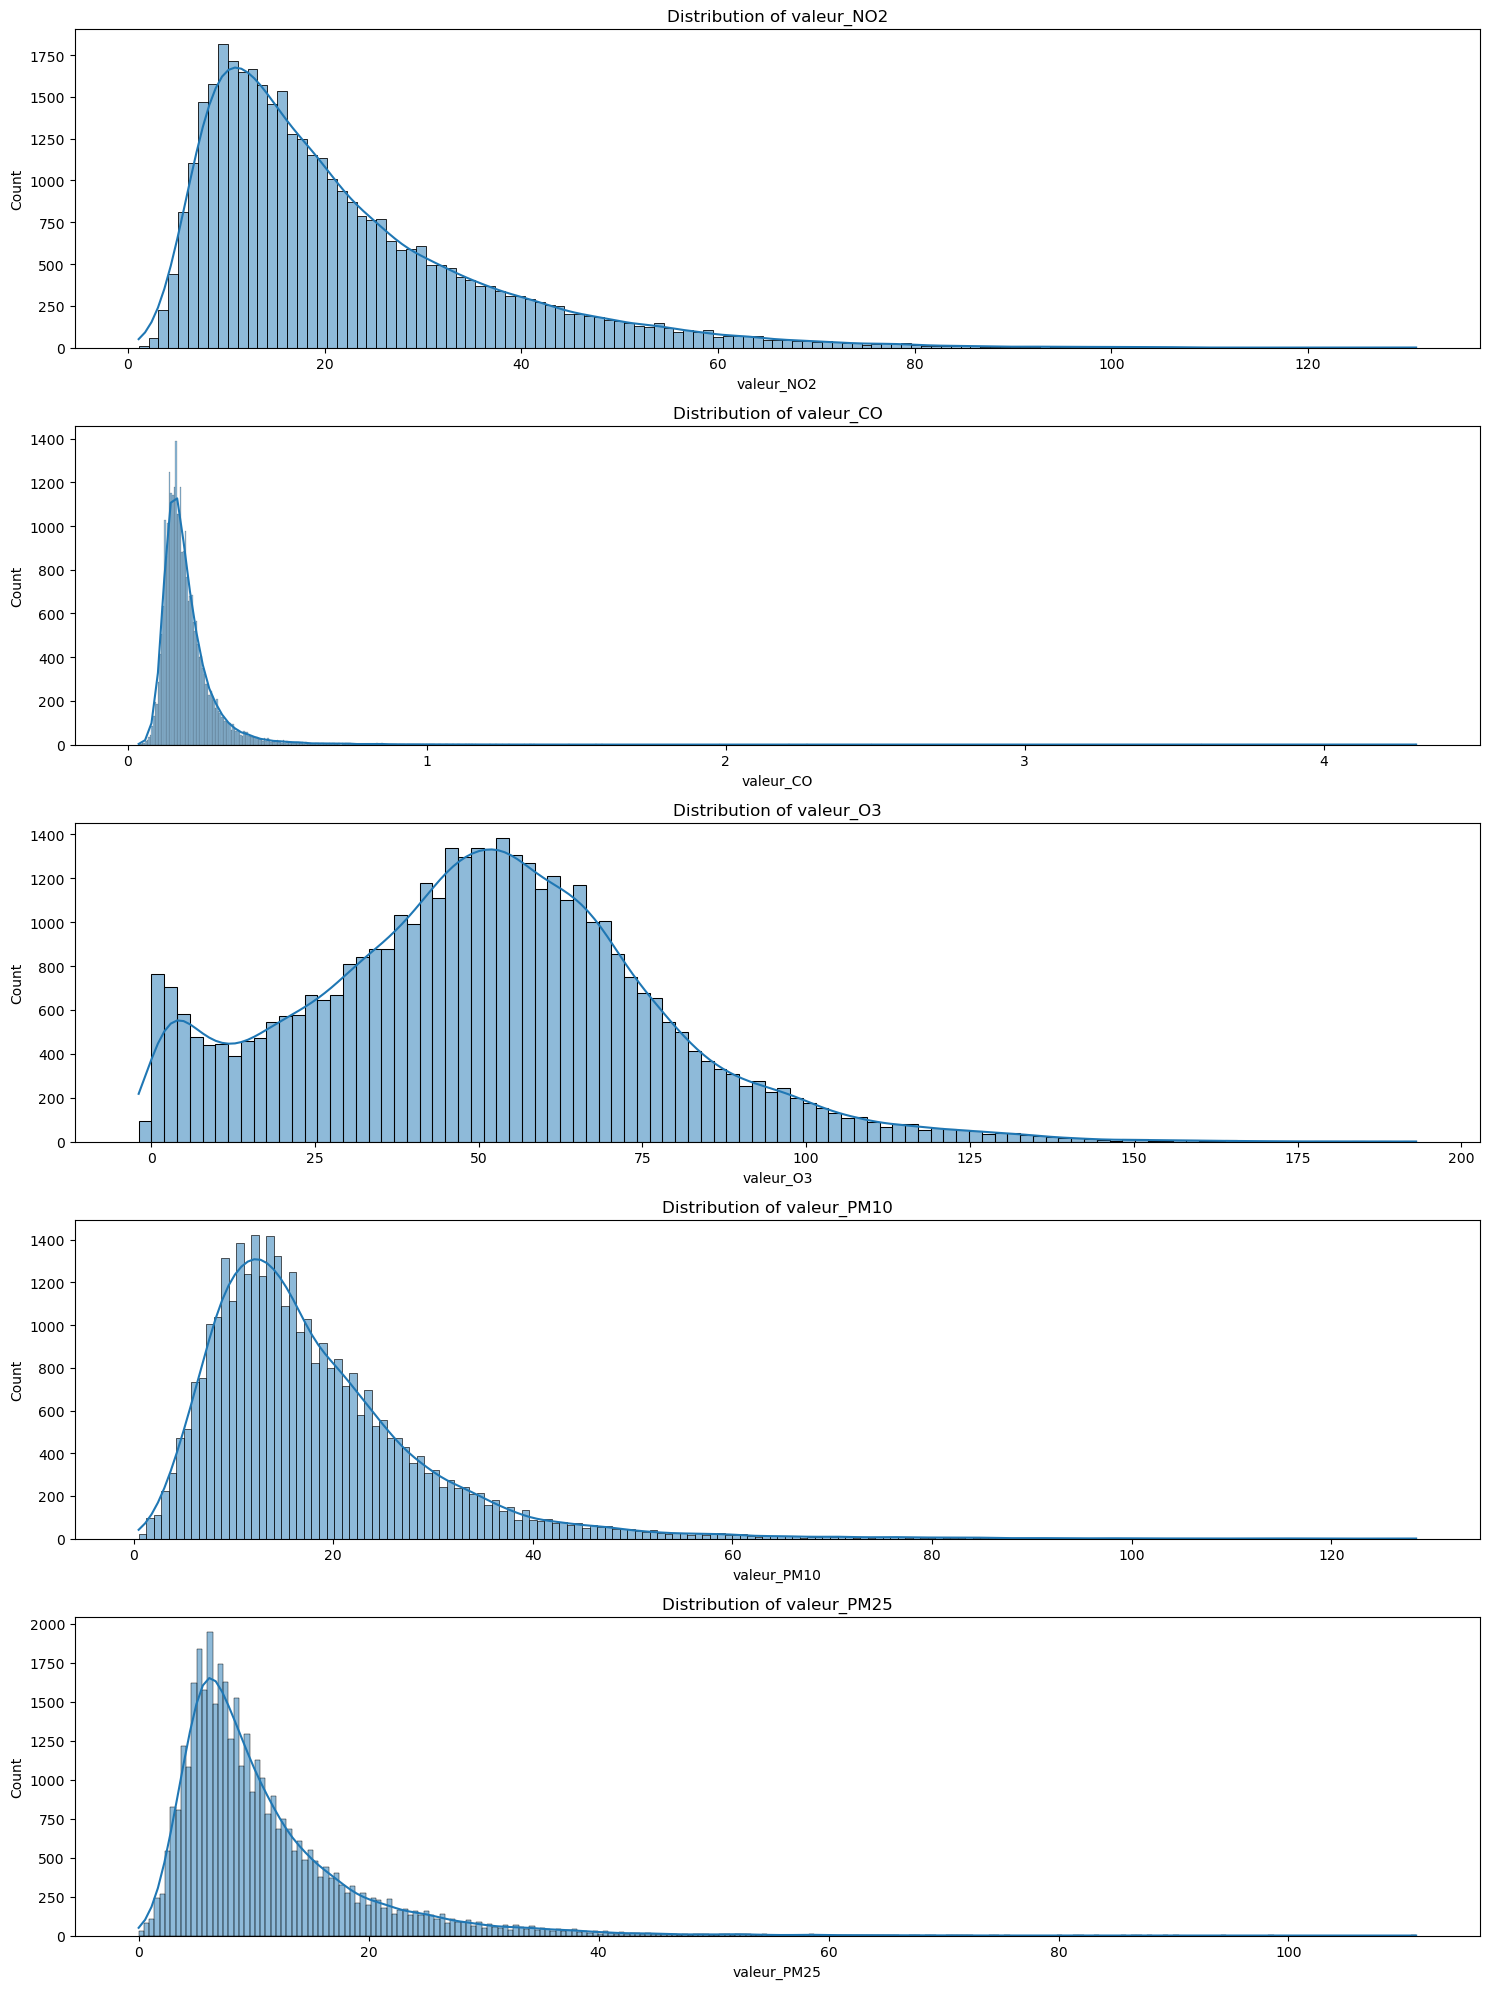

In [12]:
# Plot time series for each pollutant
fig, axes = plt.subplots(5, 1, figsize=(15, 20))
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(ax=axes[i])
    axes[i].set_title(f'Time Series of {pollutant}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Air Quality Variables')
plt.show()

# Distribution plots for each pollutant
fig, axes = plt.subplots(5, 1, figsize=(15, 20))

for i, pollutant in enumerate(pollutants):
    sns.histplot(df[pollutant], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {pollutant}')

plt.tight_layout()
plt.show()

We have missing values for NO2 and CO. Plus, distribution looks normal for all variables to predict.